In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/dwdm-petrol-prices/Petrol Prices.csv


In [2]:
data_path='/kaggle/input/dwdm-petrol-prices/Petrol Prices.csv'
data = pd.read_csv(data_path)
data.head(7)

,Date,Gasolene_87,Gasolene_90,Auto_Diesel,Kerosene,Propane,Butane,HFO,Asphalt,ULSD,87_Change,SCT,Ad_Valoreom,Ex_Refinery
0,May 2 2019,137.2128,140.0487,137.2303,116.6158,45.1236,50.5845,89.2167,106.7268,140.8874,0.82,37.7761,10%,86.96281
1,Apr 25 2019,138.0328,140.8687,137.5703,116.9758,44.2136,50.1445,87.6867,104.7568,141.2074,-1.50,37.7761,10%,87.70826
2,Apr 18 2019,136.5328,139.3687,135.1403,114.4458,44.5436,50.0945,86.8567,103.2478,139.0174,-3.07,37.7761,10%,86.34463
3,Apr 11 2019,133.4628,136.2987,133.8403,112.1558,43.4836,49.8445,84.8267,100.7478,137.6374,-2.28,37.7761,10%,83.55372
4,Apr 4 2019,131.1828,134.0187,131.3403,109.2158,43.2236,49.5945,82.0867,98.8178,135.2674,-0.16,37.7761,10%,81.48099
5,Mar 28 2019,131.0228,133.8587,131.0803,108.9458,43.0936,49.1245,81.7266,98.5178,134.5374,-2.52,37.7761,10%,81.33554
6,Mar 21 2019,128.5028,131.3387,130.7703,108.6758,44.4536,50.4245,82.1766,96.8778,134.1474,0.03,37.7761,10%,79.04463


In [29]:
data.tail(4)

,Date,Gasolene_87,Gasolene_90,Auto_Diesel,Kerosene,Propane,Butane,HFO,Asphalt,ULSD,87_Change,SCT,Ad_Valoreom,Ex_Refinery,Month,Day,Year,Timestamp
228,Jan 1 2015,92.9328,94.5887,94.4003,99.4858,37.0036,42.0145,NaN,73.036,101.267,2.04,16.1061,10%,68.37826,Jan,1,2015,2019-11-13 02:23:58.550956
229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N/A,N/A,N/A,N/A
230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N/A,N/A,N/A,N/A
231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N/A,N/A,N/A,N/A


In [5]:
copydata = pd.DataFrame(data)
#copydata.apply (pd.to_numeric, errors='coerce')
#copydata.dropna()
#copydata.reset_index(drop=True)
copydata['Month'] = pd.to_datetime(copydata['Date'], errors='coerce')
copydata['Month'] = copydata['Month'].dt.month 
copydata = copydata.dropna() #drops rows that contains NaN values

from pandasql import sqldf
df_results1 = sqldf("select count(Month) as Record, Month from copydata group by Month")
df_results1


,Record,Month
0,17,1.0
1,16,2.0
2,20,3.0
3,16,4.0
4,15,5.0
5,15,6.0
6,17,7.0
7,17,8.0
8,17,9.0
9,17,10.0


Text(0.5, 1.0, 'Number of Records per Month')

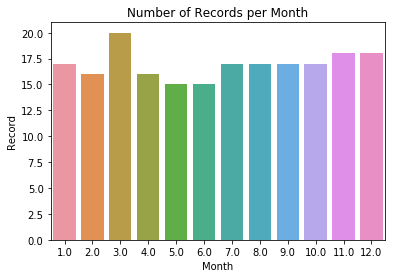

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.barplot(x='Month', y='Record', data=df_results1)
plt.title('Number of Records per Month')


#df_results1.plot(kind='barh', x='Month', title='No. of Records per Month')

In [8]:
from datetime import datetime
import calendar
import numpy as np

temp = data['Date']
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
try:
    pd.to_datetime(data['Date'], errors='raise')
    # do something
    data['Date'] = pd.to_datetime(data['Date']) #errors='coerce
    data['Month'] = data['Date'].dt.month
    data['Day'] = data['Date'].dt.day
  #  data['Day'] = data['Day'].astype(int)
    data['Year'] = data['Date'].dt.year
   # data.loc[data['Month'] != np.nan, 'Timestamp'] = pd.Timestamp.timestamp(data['Date'])
   # data['Timestamp'] = pd.Timestamp.timestamp(data['Date'])
    #now = datetime.now()    
    #data['Timestamp'] = pd.Timestamp(now)
except ValueError:
    data['Month'] = None
    data['Day'] = None
    data['Year'] = None
    data['Timestamp'] = None   
    

#data.loc[data['Month'] != np.nan, 'Timestamp':
 #           ts = pd.Timestamp(year=int(data['Date'].dt.year), month=int(data['Date'].dt.month),day=int(data['Date'].dt.day))
  #          data.loc[data['Timestamp'] = ts.timestamp()


data['Month'] = data['Month'].replace(np.nan, 'N/A', regex=True)
data['Day'] = data['Day'].replace(np.nan, 'N/A', regex=True)
data['Year'] = data['Year'].replace(np.nan, 'N/A', regex=True)



data.loc[data['Month'] == 1, 'Month'] = 'Jan'
data.loc[data['Month'] == 2, 'Month'] = 'Feb'
data.loc[data['Month'] == 3, 'Month'] = 'Mar'
data.loc[data['Month'] == 4, 'Month'] = 'Apr'
data.loc[data['Month'] == 5, 'Month'] = 'May'
data.loc[data['Month'] == 6, 'Month'] = 'Jun'
data.loc[data['Month'] == 7, 'Month'] = 'Jul'
data.loc[data['Month'] == 8, 'Month'] = 'Aug'
data.loc[data['Month'] == 9, 'Month'] = 'Sep'
data.loc[data['Month'] == 10, 'Month'] = 'Oct'
data.loc[data['Month'] == 11, 'Month'] = 'Nov'
data.loc[data['Month'] == 12, 'Month'] = 'Dec'

now = datetime.now()    
#data['Timestamp'] = 
data.loc[data['Month'] == 'N/A', 'Timestamp'] = 'N/A'
data.loc[data['Month'] != 'N/A', 'Timestamp'] = pd.Timestamp(now)



#if (pd.isnull(data['Date'])):
    
#data['Day'] = data['Day'].astype(int)


#if (data['Date'] == np.nan):
 #    data['Timestamp'] = pd.Timestamp(year=data['Date'].dt.year, 
  #                                   month=data['Date'].dt.month, 
   #                                  day=data['Date'].dt.day).timestamp()

    

#df.replace(np.nan, '', regex=True)
#data.loc[pd.isnull(data['Month']) , 'Month'] = 'N/A'
#data.loc[data['Date'] == pd.isnull(pd.NaT), 'Month'] = 'N/A'
#df.loc[df['First Season'] > 1990, 'First Season'] = 1

data['Date'] = temp

data


,Date,Gasolene_87,Gasolene_90,Auto_Diesel,Kerosene,Propane,Butane,HFO,Asphalt,ULSD,87_Change,SCT,Ad_Valoreom,Ex_Refinery,Month,Day,Year,Timestamp
0,May 2 2019,137.2128,140.0487,137.2303,116.6158,45.1236,50.5845,89.2167,106.7268,140.8874,0.82,37.7761,10%,86.96281,May,2,2019,2019-11-13 02:23:58.550956
1,Apr 25 2019,138.0328,140.8687,137.5703,116.9758,44.2136,50.1445,87.6867,104.7568,141.2074,-1.50,37.7761,10%,87.70826,Apr,25,2019,2019-11-13 02:23:58.550956
2,Apr 18 2019,136.5328,139.3687,135.1403,114.4458,44.5436,50.0945,86.8567,103.2478,139.0174,-3.07,37.7761,10%,86.34463,Apr,18,2019,2019-11-13 02:23:58.550956
3,Apr 11 2019,133.4628,136.2987,133.8403,112.1558,43.4836,49.8445,84.8267,100.7478,137.6374,-2.28,37.7761,10%,83.55372,Apr,11,2019,2019-11-13 02:23:58.550956
4,Apr 4 2019,131.1828,134.0187,131.3403,109.2158,43.2236,49.5945,82.0867,98.8178,135.2674,-0.16,37.7761,10%,81.48099,Apr,4,2019,2019-11-13 02:23:58.550956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,Jan 8 2015,91.9328,93.5887,94.4003,99.4358,35.6737,40.5245,NaN,72.3781,101.2370,1.00,16.1061,10%,67.46917,Jan,8,2015,2019-11-13 02:23:58.550956
228,Jan 1 2015,92.9328,94.5887,94.4003,99.4858,37.0036,42.0145,NaN,73.0360,101.2670,2.04,16.1061,10%,68.37826,Jan,1,2015,2019-11-13 02:23:58.550956
229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N/A,N/A,N/A,N/A
230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N/A,N/A,N/A,N/A


In [9]:
data.columns

Index(['Date', 'Gasolene_87', 'Gasolene_90', 'Auto_Diesel', 'Kerosene',
       'Propane', 'Butane', 'HFO', 'Asphalt', 'ULSD', '87_Change', 'SCT',
       'Ad_Valoreom', 'Ex_Refinery', 'Month', 'Day', 'Year', 'Timestamp'],
      dtype='object')

In [10]:
interesting_columns = data[['Gasolene_87', 'Gasolene_90', 'Auto_Diesel', 
                            'Kerosene','Propane', 'Butane', 'HFO', 'Asphalt', 'ULSD','Ex_Refinery']]

interesting_columns

,Gasolene_87,Gasolene_90,Auto_Diesel,Kerosene,Propane,Butane,HFO,Asphalt,ULSD,Ex_Refinery
0,137.2128,140.0487,137.2303,116.6158,45.1236,50.5845,89.2167,106.7268,140.8874,86.96281
1,138.0328,140.8687,137.5703,116.9758,44.2136,50.1445,87.6867,104.7568,141.2074,87.70826
2,136.5328,139.3687,135.1403,114.4458,44.5436,50.0945,86.8567,103.2478,139.0174,86.34463
3,133.4628,136.2987,133.8403,112.1558,43.4836,49.8445,84.8267,100.7478,137.6374,83.55372
4,131.1828,134.0187,131.3403,109.2158,43.2236,49.5945,82.0867,98.8178,135.2674,81.48099
...,...,...,...,...,...,...,...,...,...,...
227,91.9328,93.5887,94.4003,99.4358,35.6737,40.5245,NaN,72.3781,101.2370,67.46917
228,92.9328,94.5887,94.4003,99.4858,37.0036,42.0145,NaN,73.0360,101.2670,68.37826
229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
interesting_columns = interesting_columns.dropna().reset_index(drop=True)
#df = dfA.reset_index().dropna().set_index('index')

#interesting_columns = interesting_columns[interesting_columns.Gasolene_87 != np.nan]
#interesting_columns.reset_index(drop=True)
#interesting_columns

#df = df[df.B != 'three'] # remove where B = three
#df.reset_index(drop=True)



interesting_columns

,Gasolene_87,Gasolene_90,Auto_Diesel,Kerosene,Propane,Butane,HFO,Asphalt,ULSD,Ex_Refinery
0,137.2128,140.0487,137.2303,116.6158,45.1236,50.5845,89.2167,106.7268,140.8874,86.96281
1,138.0328,140.8687,137.5703,116.9758,44.2136,50.1445,87.6867,104.7568,141.2074,87.70826
2,136.5328,139.3687,135.1403,114.4458,44.5436,50.0945,86.8567,103.2478,139.0174,86.34463
3,133.4628,136.2987,133.8403,112.1558,43.4836,49.8445,84.8267,100.7478,137.6374,83.55372
4,131.1828,134.0187,131.3403,109.2158,43.2236,49.5945,82.0867,98.8178,135.2674,81.48099
...,...,...,...,...,...,...,...,...,...,...
199,114.1330,115.7890,100.3300,96.4958,34.9636,40.5245,51.6344,72.1617,108.3770,78.65117
200,115.2230,116.8790,101.9300,98.0358,34.9736,39.1345,52.9186,72.0365,110.1770,79.64208
201,116.9530,118.6090,103.6000,100.3260,33.9536,38.6545,53.9256,71.2465,112.3570,81.21481
202,116.0230,117.6790,105.7400,102.5460,34.0036,39.4145,56.4595,69.6930,114.3370,80.36935


In [12]:
interesting_columns.columns


Index(['Gasolene_87', 'Gasolene_90', 'Auto_Diesel', 'Kerosene', 'Propane',
       'Butane', 'HFO', 'Asphalt', 'ULSD', 'Ex_Refinery'],
      dtype='object')

(540, 592)

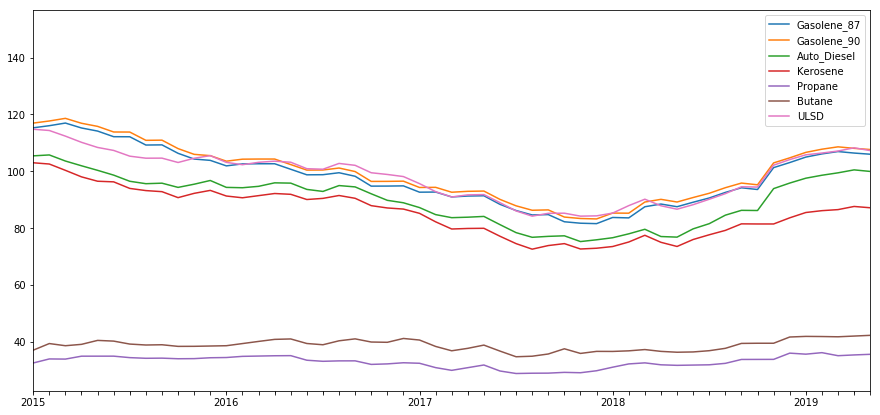

In [13]:
interesting_columns = interesting_columns.sort_index(ascending=0)
date = pd.date_range('2015/01/01', periods=204, freq='M')

df = pd.DataFrame({'Gasolene_87': interesting_columns['Gasolene_87'],
                  'Gasolene_90': interesting_columns['Gasolene_90'],
                  'Auto_Diesel': interesting_columns['Auto_Diesel'],
                  'Kerosene': interesting_columns['Kerosene'],
                  'Propane': interesting_columns['Propane'],
                  'Butane': interesting_columns['Butane'],
                  'ULSD': interesting_columns['ULSD']})
df.index = date

plot = df.plot(kind='line',xticks=df.index, figsize=(15,7))

plot.set_xlim([pd.to_datetime('2015/1/1'), pd.to_datetime('2019/5/3')])


In [14]:
percent_change = pd.DataFrame(interesting_columns['ULSD'].pct_change(periods=4)*100)
percent_change = percent_change.dropna()
percent_change

,ULSD
199,-5.576030
198,-6.130999
197,-6.274642
196,-5.064578
195,-3.469371
...,...
4,-0.726566
3,2.182670
2,3.630335
1,4.957729


(540, 592)

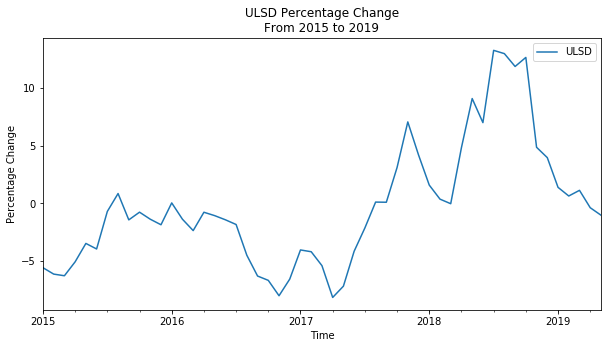

In [15]:
date = pd.date_range('2015/01/01', periods=200, freq='M')
df2 = pd.DataFrame(percent_change)
df2.index = date

plot = df2.plot(kind='line',figsize=(10,5), title='ULSD Percentage Change\nFrom 2015 to 2019')
plot.set_ylabel('Percentage Change')
plot.set_xlabel('Time')
plot.set_xlim([pd.to_datetime('2015/1/1'), pd.to_datetime('2019/5/3')])

In [16]:
cluster_data = interesting_columns[['Gasolene_87', 'Gasolene_90']]
cluster_data

,Gasolene_87,Gasolene_90
203,115.2830,116.9390
202,116.0230,117.6790
201,116.9530,118.6090
200,115.2230,116.8790
199,114.1330,115.7890
...,...,...
4,131.1828,134.0187
3,133.4628,136.2987
2,136.5328,139.3687
1,138.0328,140.8687


In [17]:
missing_data_results = cluster_data.isnull().sum()
missing_data_results

Gasolene_87    0
Gasolene_90    0
dtype: int64

In [18]:
data_values = cluster_data.iloc[:, :].values


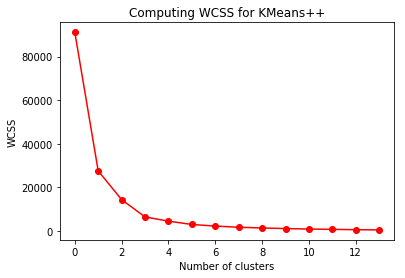

In [20]:
from sklearn.cluster import KMeans
wcss = []
for i in range( 1, 15 ):
    kmeans = KMeans(n_clusters=i, init="k-means++", n_init=10, max_iter=300) 
    kmeans.fit_predict( data_values )
    wcss.append( kmeans.inertia_ )
    
plt.plot( wcss, 'ro-', label="WCSS")
plt.title("Computing WCSS for KMeans++")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [21]:

kmeans = KMeans(n_clusters=4, init="k-means++", n_init=10, max_iter=300) 
cluster_data["Cluster"] = kmeans.fit_predict( data_values )
cluster_data

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Gasolene_87,Gasolene_90,Cluster
203,115.2830,116.9390,2
202,116.0230,117.6790,2
201,116.9530,118.6090,2
200,115.2230,116.8790,2
199,114.1330,115.7890,2
...,...,...,...
4,131.1828,134.0187,1
3,133.4628,136.2987,1
2,136.5328,139.3687,1
1,138.0328,140.8687,1


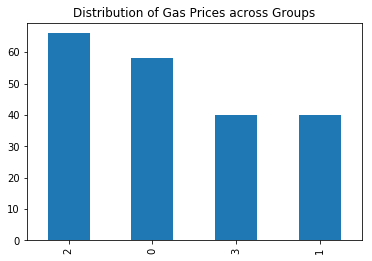

In [22]:
cluster_data['Cluster'].value_counts()

cluster_data['Cluster'].value_counts().plot(kind='bar', title='Distribution of Gas Prices across Groups')


In [23]:
grouped_cluster_data = cluster_data.groupby('Cluster')
grouped_cluster_data.describe().T

Cluster                     0           1           2           3
Gasolene_87 count   58.000000   40.000000   66.000000   40.000000
            mean   106.232324  134.322050  119.223724   92.054300
            std      3.211822    4.148958    3.488066    5.370819
            min     99.482800  127.072800  112.632800   81.582800
            25%    103.925450  131.142800  116.767800   88.155300
            50%    106.267900  134.972800  119.457800   93.137800
            75%    108.882800  137.310300  121.485300   96.580300
            max    112.153000  142.022800  126.382800   98.792800
Gasolene_90 count   58.000000   40.000000   66.000000   40.000000
            mean   108.091698  137.157950  121.970238   93.709682
            std      3.455828    4.148958    3.596853    5.373711
            min    101.139000  129.908700  115.468700   83.238700
            25%    105.581425  133.978700  119.581200   89.878700
            50%    107.923850  137.808700  122.293700   94.793700
            75%    110.926425  140.146200  124.321200   98.236200
            max    114.868700  144.858700  129.218700  100.449000

Cluster
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

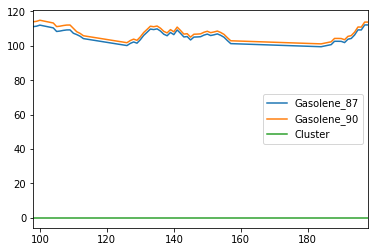

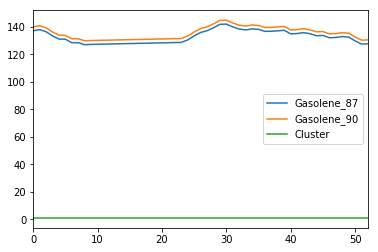

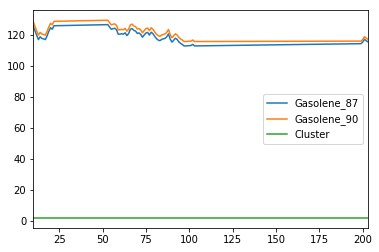

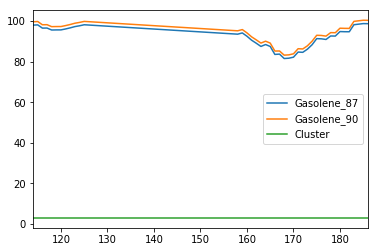

In [24]:
grouped_cluster_data.plot()

In [25]:
kmeans.cluster_centers_

array([[106.23232414, 108.09169828],
       [134.32205   , 137.15795   ],
       [119.22372424, 121.97023788],
       [ 92.0543    ,  93.7096825 ]])

In [26]:
gas_90_avg = data[['Date', 'Gasolene_90']]
gas_87_avg = data[['Date', 'Gasolene_87']]

In [27]:
gas_90_avg = gas_90_avg.sort_index(ascending=0)
gas_90_avg['Date'] = pd.to_datetime(gas_90_avg.Date, errors='coerce')
gas_90_avg = gas_90_avg.dropna()
avg_90s = gas_90_avg.groupby(gas_90_avg.Date.dt.year)['Gasolene_90'].transform('mean').unique()

gas_87_avg = gas_87_avg.sort_index(ascending=0)
gas_87_avg['Date'] = pd.to_datetime(gas_87_avg.Date, errors='coerce')
gas_87_avg = gas_87_avg.dropna()
avg_87s = gas_87_avg.groupby(gas_87_avg.Date.dt.year)['Gasolene_87'].transform('mean').unique()

date=2015
count=0
for i in avg_90s:    
    print("The average for 87 Gasoline in %i is: %.3f" % (date, avg_87s[count]) )
    print("The average for 90 Gasoline in %i is: %.3f" % (date, avg_90s[count]) )
    print("\n")
    date=date+1
    count=count+1
#df['dates'] = pd.to_datetime(df.dates)
#df.groupby(df.dates.dt.year)['vi'].transform('mean')

The average for 87 Gasoline in 2015 is: 103.617
The average for 90 Gasoline in 2015 is: 105.273


The average for 87 Gasoline in 2016 is: 98.899
The average for 90 Gasoline in 2016 is: 100.554


The average for 87 Gasoline in 2017 is: 111.148
The average for 90 Gasoline in 2017 is: 113.689


The average for 87 Gasoline in 2018 is: 129.460
The average for 90 Gasoline in 2018 is: 132.296


The average for 87 Gasoline in 2019 is: 126.284
The average for 90 Gasoline in 2019 is: 129.120




## Question 15

B. Both Gasoline 87 and 90 tend to trend in the same direction over the same period of time. They also appear to be affexted by a similar rate of change.


D. Autoregression is a time series forcasting method that uses previous events to predict future events. Autoregression can only be used in situations where there's a definite correlation between values in a time series and the values that precede and succeed them. Stephanie (2015) stated that, you only use past data to model the behavior, hence the name autoregressive (the Greek prefix auto– means “self.” ). The process is basically a linear regression of the data in the current series against one or more past values in the same series

Reference:
Stephanie (August 19, 2015). Statistics How To: Autoregressive Model: Definition & The AR Process. Retrieved from https://www.statisticshowto.datasciencecentral.com/autoregressive-model/

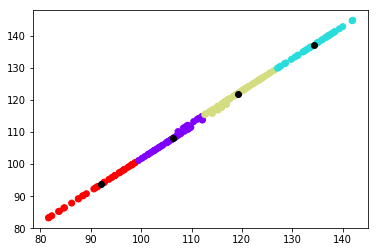

In [28]:
#grouped_cluster_data.plot()
plt.scatter(data_values[:,0], data_values[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
#plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')
#plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
#plt.scatter(grouped_cluster_data.loc[:,0], grouped_cluster_data.loc[:,1])